In [1]:
# IMPORTS

import os
import env

import pandas as pd
from pydataset import data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from math import sqrt
from scipy import stats

# import our own acquire module
import acquire
import prepare


# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from prepare import my_train_test_split, telco_training_validate_testing

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")


In [2]:
# obtaining the prepared Telco dataset.

telco_df = acquire.get_telco_data(env.sql_connexion)
tidy_telco = prepare.prep_telco(telco_df)


In [3]:
tidy_telco.info()

# there are 7043 entries (unique customers) in this dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  mont

In [4]:
# checking to see how many senior citizens 
# (0 = not a senior citizen, 5901 ; 1 = senior citizen, 1142)

tidy_telco.senior_citizen.value_counts()


0    5901
1    1142
Name: senior_citizen, dtype: int64

**The majority of customers are NOT senior citizens (5901 not vs 1142 are).**

In [5]:
# looking at churn quantity
# (not churned = 5174, churned = 1869)

tidy_telco.churn_Yes.value_counts()

0    5174
1    1869
Name: churn_Yes, dtype: int64

**The majority of customers have not churned (5174 vs 1869).**

In [6]:
# checking whether customer has online_security
# (no = 3498 ; yes = 2019 ; no internet service = 1526)

tidy_telco.online_security.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

In [7]:
# checking number of customers with online_backup 
# (no = 3088 ; yes = 2429 ; no internet service = 1526)

tidy_telco.online_backup.value_counts()

# at least the 'no internet service' is consistent.

No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64

In [8]:
# checking number of customers with device_protection
# (no = 3095 ; yes = 2422 ; no internet service = 1526)

tidy_telco.device_protection.value_counts()


No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64

In [9]:
# checking number of customers with tech_support
# (no = 3473 ; yes = 2044 ; no internet service = 1526)

tidy_telco.tech_support.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64

**A similar number of customers have or have not the optional online_security, online_backup, device_protection and tech_support.  
These may come as a package, but, clearly, not all customers are on board.  
In all cases, more customers do not elect to purchase these options than customers who elect to purchase them.**

In [10]:
# looking at internet_service_type
# (fiber optic = 3096, DSL = 2421, no internet service = 1526)

tidy_telco.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [11]:
# looking at phone_service : y / n
# (yes = 6361, no = 682)

tidy_telco.phone_service.value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

**Interesting... The majority of Telco customers have phone service  (6361 with, 682 without), yet the amount of customers without internet service is more than double the number with no phone service.**

In [12]:
# checking to see how many customers choose paperless billing 
# (yes, paperless billing = 4171, no paperless billing = 2872)

tidy_telco.paperless_billing_Yes.value_counts()

1    4171
0    2872
Name: paperless_billing_Yes, dtype: int64

In [13]:
# splitting into train-validate-test


train, validate, test = my_train_test_split(tidy_telco, target = 'churn_Yes')

train.shape, validate.shape, test.shape


((4225, 31), (1409, 31), (1409, 31))

**Now that the data has been examined simply and numerically, it's time to plot the data using graphs.**

**The first graph will examine senior citizens and churn.**

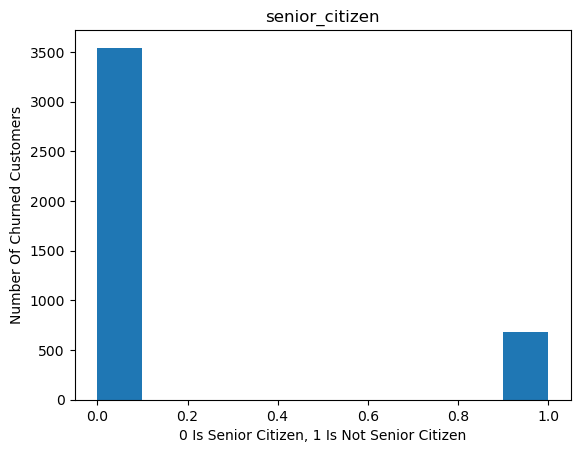

In [14]:
# histograph on senior citizens and cuztomer churn.
    
col = 'senior_citizen'

plt.hist(train[col])
plt.title(col)
plt.ylabel('Number Of Churned Customers')
plt.xlabel('0 Is Senior Citizen, 1 Is Not Senior Citizen')
plt.show()

In [15]:
## compute descriptive statistics
train.senior_citizen.describe()

count    4225.000000
mean        0.161893
std         0.368397
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: senior_citizen, dtype: float64

In [16]:
pd.crosstab(train.senior_citizen, train.churn_Yes)

## why do these results look so different from BARPLOT 5 ? 

churn_Yes,0,1
senior_citizen,,
0,2697,844
1,407,277


In [17]:
pd.crosstab(train.online_security, train.churn_Yes)

churn_Yes,0,1
online_security,,
No,1212,858
No internet service,849,74
Yes,1043,189


In [18]:
pd.crosstab(train.online_backup, train.churn_Yes)

churn_Yes,0,1
online_backup,,
No,1088,735
No internet service,849,74
Yes,1167,312


In [19]:
pd.crosstab(train.device_protection, train.churn_Yes)

churn_Yes,0,1
device_protection,,
No,1109,710
No internet service,849,74
Yes,1146,337


In [20]:
pd.crosstab(train.tech_support, train.churn_Yes)

churn_Yes,0,1
tech_support,,
No,1227,852
No internet service,849,74
Yes,1028,195


In [21]:
pd.crosstab(train.internet_service_type, train.churn_Yes)

churn_Yes,0,1
internet_service_type,,
DSL,1173,274
Fiber optic,1082,773
None,849,74


In [22]:
pd.crosstab(train.paperless_billing_Yes, train.churn_Yes)


churn_Yes,0,1
paperless_billing_Yes,,
0,1433,283
1,1671,838


In [23]:
pd.crosstab(train.phone_service, train.churn_Yes)

churn_Yes,0,1
phone_service,,
No,295,98
Yes,2809,1023


<AxesSubplot:xlabel='churn_Yes', ylabel='senior_citizen'>

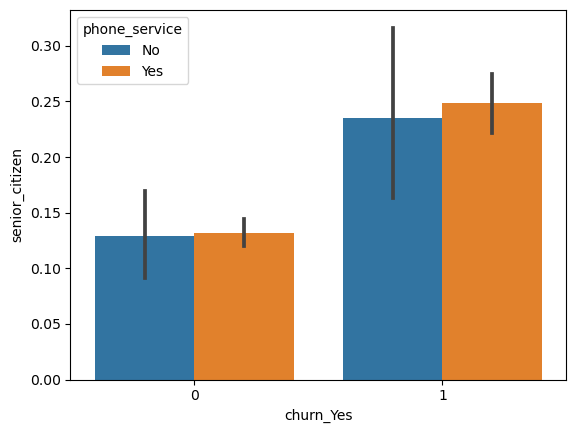

In [71]:
## BARPLOT 1 : churn (y / n) for senior citizens (y-axis) who have phone service.

sns.barplot(train.churn_Yes, train.senior_citizen, train.phone_service)


**BARPLOT 1 : It appears that, of senior citizens who have churned or have not churned, having phone service is not a notable influencer of churn.**

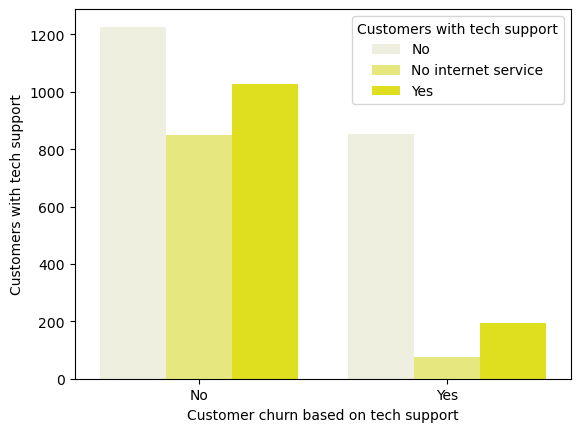

In [78]:
# COUNTPLOT 1 : tech_support and churn.

tech = sns.countplot(x = train.churn, hue = train.tech_support, color = 'yellow')

tech.set(ylabel = 'Customers with tech support', xlabel = 'Customer churn based on tech support')

plt.legend(loc = 'upper right', title = 'Customers with tech support')

**COUNTPLOT 1 : This countplot shows customer churn based on purchase of tech support. It appears that, for both customers who have churn and customers who have not churned, NOT purchasing tech support is the more popular option. Yet, of customers who have churned, the overwhelming majority did not purchase tech support. Of customers who have churned, a minimal amount had purchased tech support, which differs highly from the customers who have not churned.**

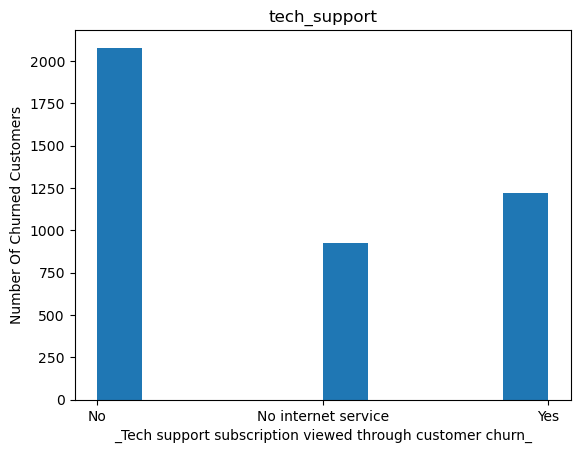

In [25]:
# HISTOGRAM 1 : tech support and all-customer churn.
    
col = 'tech_support'

plt.hist(train[col])
plt.title(col)
plt.ylabel('Number Of Churned Customers')
plt.xlabel('_Tech support subscription viewed through customer churn_')
plt.show()

<AxesSubplot:xlabel='churn_Yes', ylabel='paperless_billing_Yes'>

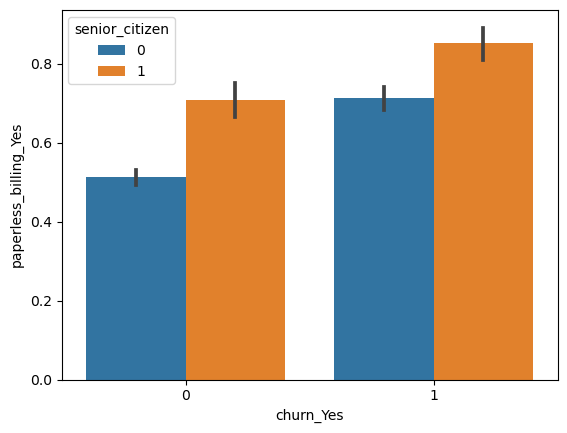

In [26]:
# BARPLOT 2 : shows churn (y / n) for senior citizens (y-axis) who use paperless billing.

sns.countplot(x = train.paperless_billing_Yes, train.senior_citizen)


**BARPLOT 2 : This barplot shows tendency to churn for senior citizens (orange bars) who select paperless billing. It appears that there are significantly more senior citizens who have churned who have selected paperless billing than non-senior citizens who have churned who have selected paperless billing.**

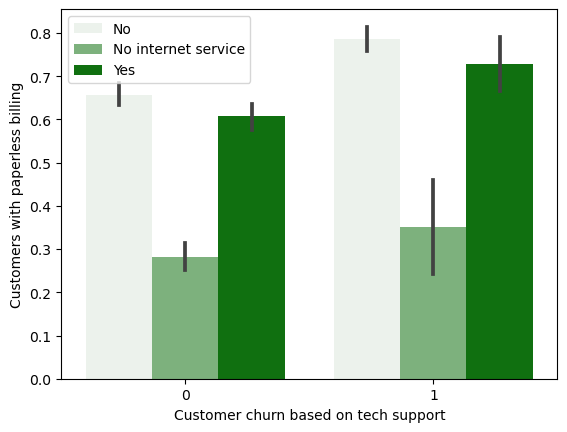

In [27]:
# BARPLOT 3 : shows customer churn (no / yes) for customers having paperless billing and tech support.

paperless_tech = sns.barplot(train.churn_Yes, train.paperless_billing_Yes, train.tech_support, color = 'green')

paperless_tech.set(ylabel = 'Customers with paperless billing', xlabel = 'Customer churn based on tech support')


plt.legend(loc = 'upper left')

**BARPLOT 3 : The above barplot shows that a notable amount of customers who (1) have churned also (2) DID use paperless billing and (3) DID NOT have tech support.   
Combining the features of tech support and paperless billing shows a lower churn rate than BARPLOT 4 (below), which portrays customer churn based on being a senior citizen and having tech support.**

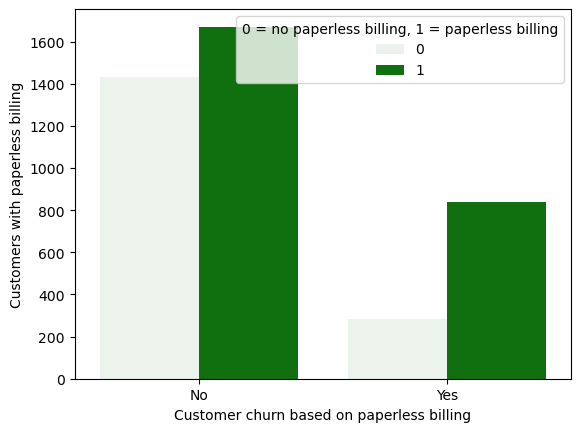

In [70]:
# COUNTPLOT 3 : churn vs paperless billing

paperless = sns.countplot(x = train.churn, hue = train.paperless_billing_Yes, color = 'green')

paperless.set(ylabel = 'Customers with paperless billing', xlabel = 'Customer churn based on paperless billing')

plt.legend(loc = 'upper right', title = '0 = no paperless billing, 1 = paperless billing')


# 0 = no paperless billing, 1 = paperless billing

**COUNTPLOT 3 : This countplot shows the relationship between customer use of paperless billing and customer churn counts. It appears that a significant amount of customers who have churn have also used paperless billing.**

[Text(0.5, 0, 'Customers with tech support'), Text(0, 0.5, 'Senior citizen')]

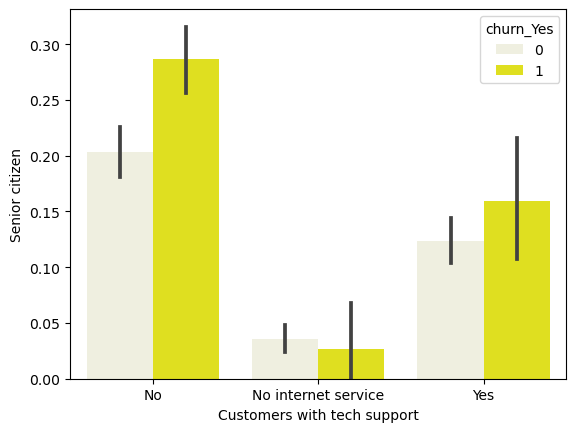

In [28]:
# BARPLOT 4 : shows churn in relation to senior citizens and tech support

tech_sup = sns.barplot(train.tech_support, train.senior_citizen, train.churn_Yes, color = 'yellow')

tech_sup.set(xlabel = 'Customers with tech support', ylabel = 'Senior citizen')



**BARPLOT 4 : The above barplot shows that the proportion of senior citizens who churned and who did not have tech support is significantly larger than senior citizens who churned and had tech support.  
Also, the proportion of senior citizens who did not churn and who did not have tech support is larger than senior citizens who did or did not churn AND who had tech support.**

<AxesSubplot:xlabel='senior_citizen', ylabel='count'>

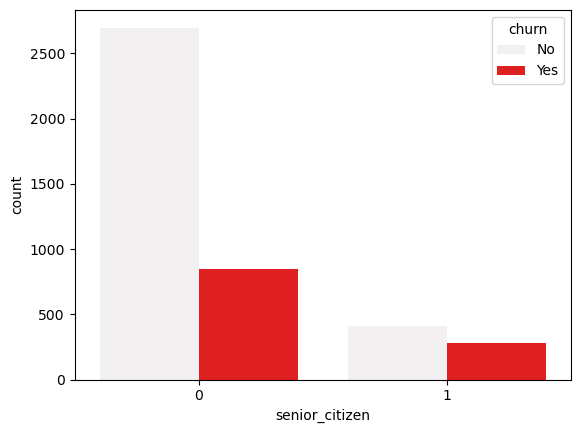

In [58]:
# COUNTPLOT 5 : customer churn and senior citizen

sns.countplot(x = train.senior_citizen, hue = train.churn, color = 'red')


**COUNTPLOT 5 : This countplot shows senior citizen churn rate. It appears that of the senior citizen customers (senior_citizen = 1) of Telco, though a smaller overall percentage of the customer base, the comparative rate of churn was higher than for non-senior citizens.**

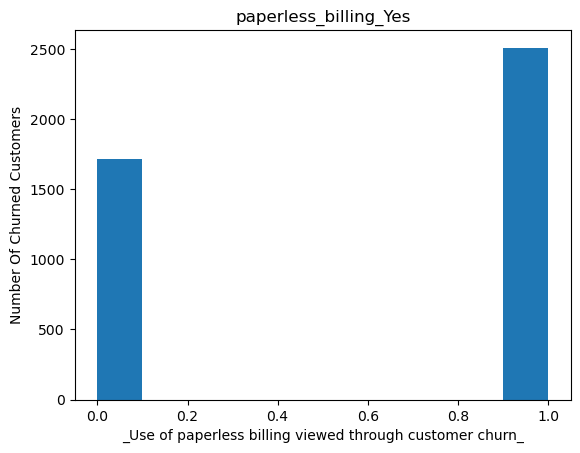

In [37]:
# HISTOGRAM 2 : paperless billing and all-customer churn.
    
col = 'paperless_billing_Yes'

plt.hist(train[col])
plt.title(col)
plt.ylabel('Number Of Churned Customers')
plt.xlabel('_Use of paperless billing viewed through customer churn_')
plt.show()

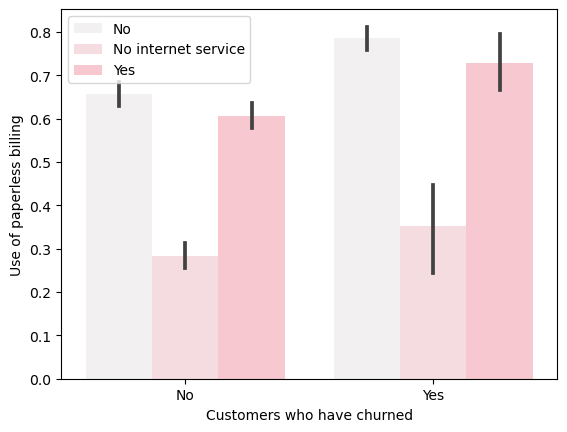

In [41]:
# BARPLOT 6 : paperless billing and tech support (N / Y / no internet service) based on all-customer churn.


paperless_allchurn = sns.barplot(train.churn, train.paperless_billing_Yes, train.tech_support, color = 'pink')

paperless_allchurn.set(xlabel = 'Customers who have churned', ylabel = 'Use of paperless billing')


plt.legend(loc = 'upper left')

**BARPLOT 6 : This barplot shows that the proportion of customers (1)  who have churned and (2) who use paperless billing and (3) do NOT have tech support is higher than customers who have NOT churned and, both, who do or do not have tech support.**

In [ ]:
# sns.swarmplot(x = train.phone_service, y = train.churn_Yes, hue = train.internet_service_type)
# plt.xticks(rotation=45)

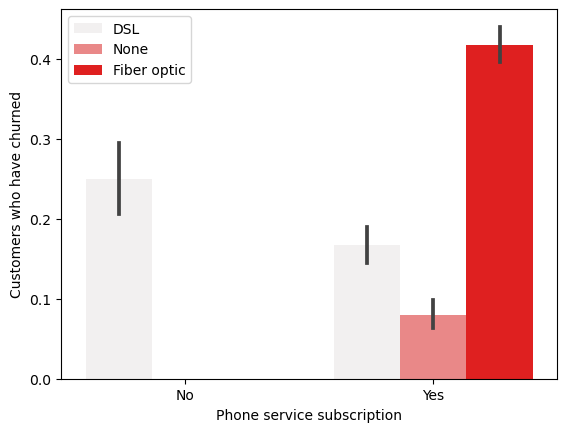

In [72]:
# BARPLOT 7 : phone service and and internet service type based on all-customer churn.


phone_ist = sns.barplot(x = train.phone_service,  y = train.churn_Yes, hue = train.internet_service_type, color = 'red')

phone_ist.set(ylabel = 'Customers who have churned', xlabel = 'Phone service subscription')

plt.legend(loc = 'upper left')


**BARPLOT 7 : This barplot shows customer churn rates for customers having or not having phone service according to their internet service type.  
An extremely large number of customers who have phone service and who used fiber obtic internet have churned, more than any other category.**

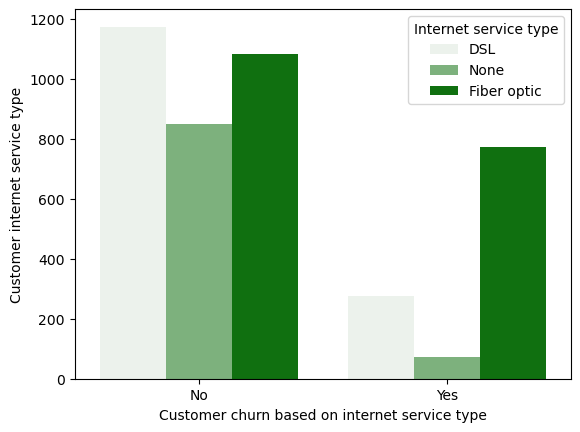

In [80]:
# COUNTPLOT 7 : The internet_service_type (ie, DSL, Fiber optic, no internet service) AND churn rate.

ist = sns.countplot(x = train.churn, hue = train.internet_service_type, color = 'green')


ist.set(ylabel = 'Customer internet service type', xlabel = 'Customer churn based on internet service type')

plt.legend(loc = 'upper right', title = 'Internet service type')

**COUNTPLOT 7 : This countplot shows the churn propensity for customers based on their internet service type. Churn or not, Fiber Optic internet is the more popular overall. For customers who have churned, an overwhelming amount were Fiber Optic subscribers.**